# Importações e Configurações

In [54]:
import os
import json
import shutil
from os import listdir
import pandas as pd
import glob
import seaborn as sns
from querido_diario_toolbox import Gazette
from querido_diario_toolbox.etl.text_extractor import create_text_extractor
import matplotlib.pyplot as plt
config = {"apache_tika_jar": "tika-app-1.24.1.jar"}
extrator = create_text_extractor(config)

# Extraindo .txt e metadados de todos os PDFs

In [10]:
# Extraindo .txt

for folder in listdir("data/02"):
    # os.mkdir(os.path.join('data/02', folder, 'txt'))
    for file in listdir(os.path.join('data/02', folder, 'pdfs')):
        if (file[:-4] + '.txt') not in listdir(os.path.join('data/02', folder, 'txt')):
            try:
                with open(os.path.join('data/02', folder, 'pdfs', file)) as f:
                    diario = Gazette(filepath=os.path.join('data/02', folder, 'pdfs', file))
                    extrator.extract_text(diario)
                shutil.move(os.path.join('data/02', folder, 'pdfs', file[:-4]) + '.txt', os.path.join('data/02', folder, 'txt', file[:-4]) + '.txt')
            except:
                continue

In [11]:
# Extraindo metadados

for folder in listdir("data/02"):
    os.mkdir(os.path.join('data/02', folder, 'json'))
    for file in listdir(os.path.join('data/02', folder, 'pdfs')):
        if (file[:-4] + '.json') not in listdir(os.path.join('data/02', folder, 'json')):
            try:
                with open(os.path.join('data/02', folder, 'pdfs', file)) as f:
                    diario = Gazette(filepath=os.path.join('data/02', folder, 'pdfs', file))
                    extrator.extract_metadata(diario)
                shutil.move(os.path.join('data/02', folder, 'pdfs', file[:-4]) + '.json', os.path.join('data/02', folder, 'json', file[:-4]) + '.json')
            except:
                continue

# Encontrando Palavras Chaves

In [26]:
with open ('log.csv', 'w') as csv:
    csv.write('filename,cod_ibge_municipio,cod_ibge_estado,data,remedio\n')
    for folder in listdir("data"):
        for file in listdir(os.path.join('data', folder, 'txt')):
            with open(os.path.join('data', folder, 'txt', file)) as currentFile:
                text = currentFile.read().upper()
                if 'IVERMECTINA' in text:
                    with open(os.path.join('data', folder, 'json', file[:-4]) + '.json') as js:
                        try:
                            text = json.loads(js.read())
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + text['date'] + ',' +'ivermectina\n')
                            print(folder, file)
                        except:
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + 'Não Informado' + ',' +'ivermectina\n')
                            print(f'Arquivo com erro {folder, file}')

3304557 4168749af2f8f997880e29e4096ba5e6ba1ad62d.txt.txt
3304557 6e3f63b1c3114efeceeb85535d4f0c65d520ad99.txt.txt
3304557 d4bebd4c02f541118eea9f36989f5526592eba8f.txt.txt
3304557 3b53fc8cec7d0b92c6130efdf59db042e4a256c2.txt.txt
3304557 cf6b2743f4f0721c3f09484bebab6d75c45a4d87.txt.txt
2408003 769142b06e94975d200693c35e95775de21122aa.txt
2408003 7ce37fa37b2a34acf0f3a1793905c1b70a4a7419.txt
1721000 7c0d4ebd3b7b705241d8c95c53330c394a324218.txt
1721000 55bb79740210d85ea9b94b518d6783b3a69f27d9.txt
1721000 fdddffe16bba9c9f493c4a98e3a0dc4ce3d7518f.txt
4106902 733620757bb3a7f576468f065331192166a9b102.txt
4106902 676d0a35bd0b3a0ecad0c231a8e3b988a1d8d040.txt
4106902 fa55d6b3d6ac583c438cecd5f903ce4af9f11466.txt
4106902 7680369a6d41818268ed9b0527c3426e55ca5376.txt
4106902 185aaa6c889beb0020f46e17482782df4897db6c.txt
4106902 fa73504e42fbf7b4a49c6c9123ef0819431fe2e2.txt
4106902 a3ff890b18f7bb823699381393fb5b4723914dc0.txt
4106902 6183d48861be5cdd1803f96502ae55fb9ae3f93b.txt
4106902 c724e93a03bc25ea35

3550308 dcf43df5786baf0cf8be00fb38c23a9a018c5ce0.txt
3550308 45b68592888d27edc571dcbcce2c236d34d08bd4.txt
3550308 b3cecc1401394545768115250be435f6efcf6ffd.txt
3550308 1dd3fc1b2a2a3affdd7918ef683f5430930ff5c2.txt
3550308 c960db03d5b1f210a2961791a07538dad209cf27.txt
3550308 a1a6e68c0080bfb6c52a82c280a70cfa37f36855.txt
3550308 08d5c00c5773be6c005963ec8d56803fb724bb60.txt
3550308 5ea6bea0f4f7f304215548d6457031b1608ad8fd.txt
3550308 09023956632e4935714ff87b306f1d513f7ba76b.txt
3550308 00b34ec8600e9c85f5a699e511d0330f4702a61f.txt
3550308 e8ec4d53776b9dbc75b94244d8397aa4b30c33b6.txt
3550308 a8f4d20d26134ad2453fb6327ac74987b7762587.txt
3550308 1590536db0914f865e4902f3a9f0832352fa2675.txt
3550308 94cc93ec108546acc7ecc02a4b751750bb6f4ebb.txt
3550308 6f5d87253a5c8b2831e3006a44f197613265b6dc.txt
3550308 d125c2993f581be3aad6e63e2aea2c3f385c7951.txt
3550308 034063b5166c5f22fb8958864c50cd74321a268c.txt
2408102 ac31977044429805a0890d3ca5201c977c34da26.txt
2408102 00f5e0c4522c970495291edb51424bc7f8e707

In [29]:
with open ('log.csv', 'a') as csv:
    for folder in listdir("data"):
        for file in listdir(os.path.join('data', folder, 'txt')):
            with open(os.path.join('data', folder, 'txt', file)) as currentFile:
                text = currentFile.read().upper()
                if 'CLOROQUINA' in text:
                    with open(os.path.join('data', folder, 'json', file[:-4]) + '.json') as js:
                        try:
                            text = json.loads(js.read())
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + text['date'] + ',' +'cloroquina\n')
                            print(folder, file)
                        except:
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + 'Não Informado' + ',' +'cloroquina\n')
                            print(f'Arquivo com erro {folder, file}')

3304557 bb230155c3cb95cdb072dccf2dfc0f79d3e55036.txt.txt
3304557 18ac8de2171a131030405ff2175f09eab7452c5e.txt.txt
2927408 f3dca316dbbea930cab54ddb4b72467c37074a9f.txt
5208707 a16dc58fa3af005fc7659df1b5cbe39c7e4713df.txt
2504009 aa511eaf81b75217ba1e5f80cb7f3dd16f629f4b.txt
2504009 48d5d9d40ade1300db766b478718222a0da1a14d.txt
4314902 27e132db163fec2330a4d2a31a60d78e8e18f482.txt
3106200 a8120b9ac23fd094554ff3e2b12166a40ee9aae2.txt
4205407 229c3374c4930587d7fc26969ccd5c815b57ab31.txt
4205407 2a3d8d348fb4e73a5556a711210fb581c620e662.txt
4205407 d43dbce3105fa1a2426b37e782d7dc54f98bc67c.txt
1501402 6ee8665de33aa7ff1889b92dabf5db6a8bd1c175.txt
1501402 8833dd14a07abf3e6720ba6502645911c3684e8b.txt
1501402 f50783d14962dbf599c5f55c1824469430d5c4cb.txt
5300108 b4beea6c8bda4c870c796b51a21a2e5d13192ba2.txt
5300108 a82e68eea9106fb672bf4c3dbd458f7c229eb9bd.txt
5300108 604e6a9bf3003eb65d7e950ef17b62116e0e8795.txt
5300108 91db2515fd0406b0408f1ae092c6ccc5fce46134.txt
5300108 52f9fd895f1a4eeb56709b6e8897e3

In [31]:
with open ('log.csv', 'a') as csv:
    for folder in listdir("data"):
        for file in listdir(os.path.join('data', folder, 'txt')):
            with open(os.path.join('data', folder, 'txt', file)) as currentFile:
                text = currentFile.read().upper()
                if 'HIDROXICLOROQUINA' in text:
                    with open(os.path.join('data', folder, 'json', file[:-4]) + '.json') as js:
                        try:
                            text = json.loads(js.read())
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + text['date'] + ',' +'hidroxicloroquina\n')
                            print(folder, file)
                        except:
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + 'Não Informado' + ',' +'hidroxicloroquina\n')
                            print(f'Arquivo com erro {folder, file}')

3304557 bb230155c3cb95cdb072dccf2dfc0f79d3e55036.txt.txt
3304557 18ac8de2171a131030405ff2175f09eab7452c5e.txt.txt
2927408 f3dca316dbbea930cab54ddb4b72467c37074a9f.txt
4314902 27e132db163fec2330a4d2a31a60d78e8e18f482.txt
4205407 229c3374c4930587d7fc26969ccd5c815b57ab31.txt
4205407 2a3d8d348fb4e73a5556a711210fb581c620e662.txt
4205407 d43dbce3105fa1a2426b37e782d7dc54f98bc67c.txt
1501402 6ee8665de33aa7ff1889b92dabf5db6a8bd1c175.txt
1501402 f50783d14962dbf599c5f55c1824469430d5c4cb.txt
5300108 b4beea6c8bda4c870c796b51a21a2e5d13192ba2.txt
5300108 604e6a9bf3003eb65d7e950ef17b62116e0e8795.txt
5300108 91db2515fd0406b0408f1ae092c6ccc5fce46134.txt
5300108 52f9fd895f1a4eeb56709b6e8897e357528d9534.txt
5300108 8b769e2c073d51a53f58301b9a8fe331d9a86eae.txt
5300108 a219ab72506b02eb022ac5f798b4904fd798894a.txt
5300108 1cf800aa70a8086a9bbed7035580f074bb719de0.txt
5300108 5407fe9229cbf6a82de488ad2a64e4dda9e9c9cb.txt
5103403 4c2fd8494935ea2b2a66ca89f6a03bb5ee52cda5.txt
5103403 f659ab69130a3bec4761b3f8f079fb

In [32]:
with open ('log.csv', 'a') as csv:
    for folder in listdir("data"):
        for file in listdir(os.path.join('data', folder, 'txt')):
            with open(os.path.join('data', folder, 'txt', file)) as currentFile:
                text = currentFile.read().upper()
                if 'AZITROMICINA' in text:
                    with open(os.path.join('data', folder, 'json', file[:-4]) + '.json') as js:
                        try:
                            text = json.loads(js.read())
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + text['date'] + ',' +'azitromicina\n')
                            print(folder, file)
                        except:
                            csv.write(file + ',' + folder + ',' + folder[:2] + ',' + 'Não Informado' + ',' +'azitromicina\n')
                            print(f'Arquivo com erro {folder, file}')

3304557 72a3c84d5fbd29b071a4b24eef45c1aab9fc81ca.txt.txt
3304557 4168749af2f8f997880e29e4096ba5e6ba1ad62d.txt.txt
3304557 d4bebd4c02f541118eea9f36989f5526592eba8f.txt.txt
3304557 6ce01fd90a31a40788d58e2bc44fb344ce768f3c.txt.txt
3304557 3b53fc8cec7d0b92c6130efdf59db042e4a256c2.txt.txt
3304557 cf6b2743f4f0721c3f09484bebab6d75c45a4d87.txt.txt
3304557 32542081f5af8a919a28f70e342b81f315f84328.txt.txt
2408003 c4b21dd85a119a06055eb1bb38d8679a2b969abe.txt
2408003 f12b17663bb9cf6aae1f9bf886300c501cdbd245.txt
2408003 7ce37fa37b2a34acf0f3a1793905c1b70a4a7419.txt
1721000 75d6e94c8429771f03f3c565f588dfc14c938f3e.txt
1721000 d1d21501ac16ec41d45b779b26e109ac3a46a979.txt
1721000 8eb6669532405cf71b8257dd4bd1a520b0635fdf.txt
1721000 fdddffe16bba9c9f493c4a98e3a0dc4ce3d7518f.txt
4106902 d04364889caa411ec6b3e7823470c6a47d5122fb.txt
4106902 733620757bb3a7f576468f065331192166a9b102.txt
4106902 07ed7700fe5e72deffdcb5ec172b12422f6faf06.txt
4106902 a1916c58acbf0078042da14fca419dd6f12fd46e.txt
4106902 ddf7662edd

5300108 ca874b9e637851771467ff1a42d87b720fb82816.txt
5300108 e51cc552c0de7fb7f94aa383e1b58e397e7a32cc.txt
5300108 55db95e3cb52f0e488360ea89d2b7aeed9fd1245.txt
5300108 65f5044277f03d569496a067f47e321e324c2796.txt
5300108 286a0c8983327003adfd683af8576ae940a2c01a.txt
5300108 0e40e8e3eda6ec6795d252753d58022ab36c3836.txt
5300108 14242aa2dd2ac4f3ee67a1a64e3c32529331d09d.txt
5300108 bab6159a04cfab45bf3c39e4de869b7b08445910.txt
5300108 0b9645e84f83535b63b33b0b4b7a18e0ee1ca83d.txt
5300108 c539d0e040dfd9e74908a7243f51bfbf2e2c4724.txt
5300108 f61e92d3b5370e2e366f426a3b6e51dbc82b19f0.txt
5300108 c81147f4b117cf57a9daf80c668b88f28076b980.txt
5300108 e8e066b97734414b6787a2c4bdb95c63318b4d59.txt
5300108 d5801c34f1842a894ea67ccafa0d068549cc3bef.txt
5300108 e3358ee2958a9845125685d74d04d189476f191b.txt
5300108 3499cccfa12191cad27c2ea9c86357285a03407a.txt
5300108 2b8c8143fe74104d4dc74ff1d43d33075b04ed97.txt
5300108 59a0a056076e857b3cf126895239a377670a56c8.txt
5300108 be96d0ea851c9223da7d5a6865b9d43a68847a

# Limpeza dos Dados

In [27]:
# Observe no arquivo log.csv que a coluna numero_de_paginas está com aspas duplas em algumas colunas
df = pd.read_csv('log.csv')
df

,filename,data,numero_de_paginas,remedio
0,ac31977044429805a0890d3ca5201c977c34da26.txt,2021-03-24,6,ivermectina
1,01d1497fc1495386ca18321c12da47987c565c46.txt,2021-03-17,"22""",ivermectina
2,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,"16""",ivermectina
3,58dc77d00476c8c637c22e36b831ebd9ece8d5d3.txt,2021-02-04,"13""",ivermectina
4,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,cloroquina
5,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,hidroxicloroquina
6,69f549f8877a49f378cd03b0fd6ed240f15ef2c7.txt,2020-07-27,11,azitromicina
7,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,azitromicina


In [29]:
df['numero_de_paginas'] = df['numero_de_paginas'].str.replace('"', '')
df

,filename,data,numero_de_paginas,remedio
0,ac31977044429805a0890d3ca5201c977c34da26.txt,2021-03-24,6,ivermectina
1,01d1497fc1495386ca18321c12da47987c565c46.txt,2021-03-17,22,ivermectina
2,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,ivermectina
3,58dc77d00476c8c637c22e36b831ebd9ece8d5d3.txt,2021-02-04,13,ivermectina
4,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,cloroquina
5,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,hidroxicloroquina
6,69f549f8877a49f378cd03b0fd6ed240f15ef2c7.txt,2020-07-27,11,azitromicina
7,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,azitromicina


# Visualização dos Dados

[Text(0, 0, '177'), Text(0, 0, '87'), Text(0, 0, '55'), Text(0, 0, '304')]

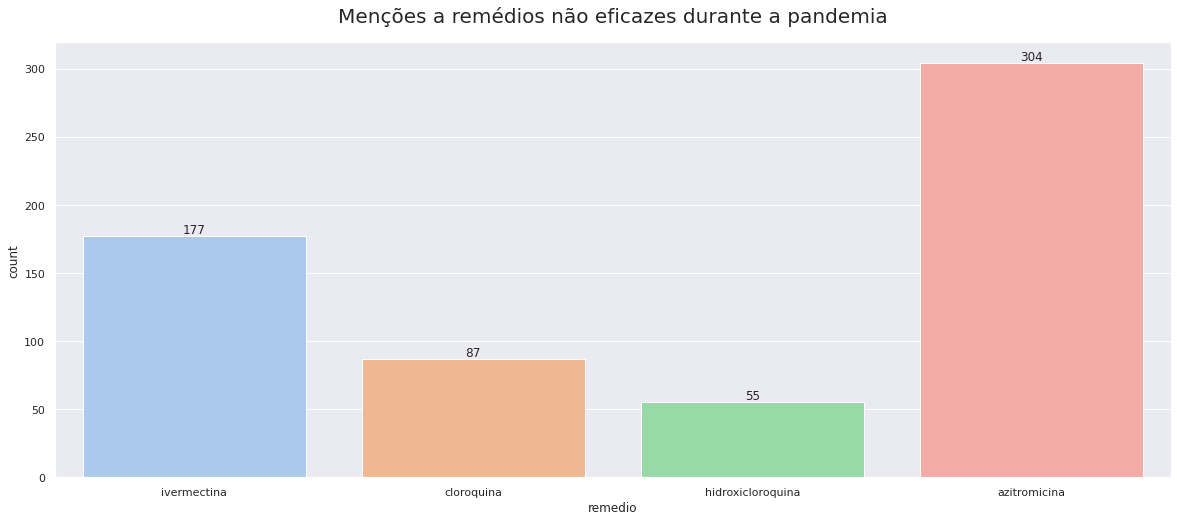

In [35]:
# Quantas vezes cada medicamente não eficaz aparece em diários oficiais?
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x = 'remedio', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])

In [34]:
df = pd.read_csv('log.csv')
df.shape[0]

623

In [36]:
df.head()

,filename,cod_ibge_municipio,cod_ibge_estado,data,remedio
0,4168749af2f8f997880e29e4096ba5e6ba1ad62d.txt.txt,3304557,33,2020-06-22T01:35:29Z,ivermectina
1,6e3f63b1c3114efeceeb85535d4f0c65d520ad99.txt.txt,3304557,33,2021-11-29T00:15:10Z,ivermectina
2,d4bebd4c02f541118eea9f36989f5526592eba8f.txt.txt,3304557,33,2020-11-18T03:53:22Z,ivermectina
3,3b53fc8cec7d0b92c6130efdf59db042e4a256c2.txt.txt,3304557,33,2021-07-21T04:10:08Z,ivermectina
4,cf6b2743f4f0721c3f09484bebab6d75c45a4d87.txt.txt,3304557,33,2020-08-01T07:58:25Z,ivermectina


In [39]:
municipios = pd.read_csv('codigo_municipio.csv')
municipios.head()

,municipio,codigo
0,Maceio,2704302
1,João Pessoa,2507507
2,Salvador,2927408
3,Natal,2408102
4,Teresina,2211001


In [44]:
estados = pd.read_csv('codigo_estado.csv')
estados.head()

,estado,codigo
0,Alagoas,27
1,Paraíba,25
2,Bahia,29
3,Rio Grande do Norte,24
4,Piauí,22


In [42]:
df = pd.merge(df, municipios, how='left', left_on='cod_ibge_municipio', right_on='codigo')

In [47]:
df = pd.merge(df, estados, how='left', left_on='cod_ibge_estado', right_on='codigo')

In [48]:
df.head()

,filename,cod_ibge_municipio,cod_ibge_estado,data,remedio,municipio,codigo_x,estado,codigo_y
0,4168749af2f8f997880e29e4096ba5e6ba1ad62d.txt.txt,3304557,33,2020-06-22T01:35:29Z,ivermectina,Rio de Janeiro,3304557,Rio de Janeiro,33
1,6e3f63b1c3114efeceeb85535d4f0c65d520ad99.txt.txt,3304557,33,2021-11-29T00:15:10Z,ivermectina,Rio de Janeiro,3304557,Rio de Janeiro,33
2,d4bebd4c02f541118eea9f36989f5526592eba8f.txt.txt,3304557,33,2020-11-18T03:53:22Z,ivermectina,Rio de Janeiro,3304557,Rio de Janeiro,33
3,3b53fc8cec7d0b92c6130efdf59db042e4a256c2.txt.txt,3304557,33,2021-07-21T04:10:08Z,ivermectina,Rio de Janeiro,3304557,Rio de Janeiro,33
4,cf6b2743f4f0721c3f09484bebab6d75c45a4d87.txt.txt,3304557,33,2020-08-01T07:58:25Z,ivermectina,Rio de Janeiro,3304557,Rio de Janeiro,33


In [52]:
df[['filename', 'data', 'municipio', 'estado', 'remedio']].to_csv('log_2.csv')

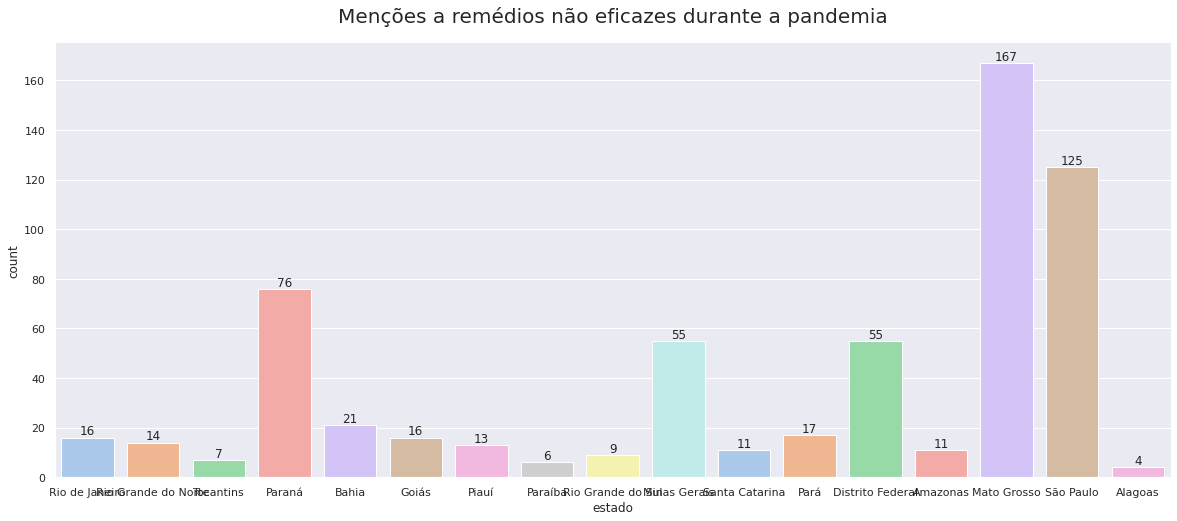

In [57]:
# Quantas vezes cada medicamente não eficaz aparece em diários oficiais?
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x = 'estado', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])

plt.show()